# Tensorflow Demo 2
 - Dropout, batch_normalization
 - High level api
 - Tensorboard
 > - https://github.com/hunkim/DeepLearningZeroToAll
  - https://tensorflowkorea.gitbooks.io/tensorflow-kr/content/g3doc/tutorials/
  - https://r2rt.com/implementing-batch-normalization-in-tensorflow.html

---
## Optimizers, Dropout

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# reset and make a new graph
tf.reset_default_graph()

# parameters
learning_rate = 0.02
training_epochs = 15
# use mini batch
batch_size = 100
# L2 coefficient
ALPHA = 0.01
# dropout probability
DROPOUT=0.5

# input place holders
X = tf.placeholder(tf.float32, [None, 784]) #28*28
Y = tf.placeholder(tf.float32, [None, 10])
# add Dropout
keep_prob = tf.placeholder(tf.float32) # 뉴런을 켤 확률

# weights & bias for nn hidden layers
# 2-hidden layers
# W1 = tf.Variable(tf.random_normal([784, 256]))
W1 = tf.get_variable(name="weight_1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

# W2 = tf.Variable(tf.random_normal([256, 256]))
W2 = tf.get_variable(name='weight_2', shape=[256, 256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
# add Dropout
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

# W3 = tf.Variable(tf.random_normal([256, 10]))
W3 = tf.get_variable(name='weight_3', shape=[256, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
# softmax function
hypothesis = tf.matmul(L2, W3) + b3


# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
# # add L2 regularizer at W3
# regularizers = tf.nn.l2_loss(W3)
# cost = tf.reduce_mean(cost+regularizers*ALPHA)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
# optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(cost)
# optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

In [5]:
%%time
# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(mnist.train.num_examples/batch_size*training_epochs)
for i in range(total_iter):
    batch = mnist.train.next_batch(batch_size)
    optimizer.run(feed_dict={X: batch[0], Y: batch[1], keep_prob:DROPOUT})

    if i % 200 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1})
        val_accuracy = accuracy.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels, keep_prob:1})
        cost_ = cost.eval(feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)

print('--------------------------')
print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob:1}))

step 0: acc_tr 0.0931273, acc_tt 0.1004, cost 2.7432
step 200: acc_tr 0.732836, acc_tt 0.7358, cost 1.05825
step 400: acc_tr 0.828364, acc_tt 0.8338, cost 0.642141
step 600: acc_tr 0.857618, acc_tt 0.8594, cost 0.503688
step 800: acc_tr 0.870073, acc_tt 0.8732, cost 0.438233
step 1000: acc_tr 0.881691, acc_tt 0.8854, cost 0.397784
step 1200: acc_tr 0.891545, acc_tt 0.898, cost 0.364788
step 1400: acc_tr 0.894818, acc_tt 0.8986, cost 0.344891
step 1600: acc_tr 0.901345, acc_tt 0.9058, cost 0.329294
step 1800: acc_tr 0.903891, acc_tt 0.9076, cost 0.315166
step 2000: acc_tr 0.908127, acc_tt 0.9136, cost 0.303363
step 2200: acc_tr 0.909309, acc_tt 0.9142, cost 0.295113
step 2400: acc_tr 0.913127, acc_tt 0.9188, cost 0.280781
step 2600: acc_tr 0.916055, acc_tt 0.9216, cost 0.274248
step 2800: acc_tr 0.918218, acc_tt 0.923, cost 0.265875
step 3000: acc_tr 0.920345, acc_tt 0.9252, cost 0.25732
step 3200: acc_tr 0.922164, acc_tt 0.9254, cost 0.252065
step 3400: acc_tr 0.9234, acc_tt 0.9276, co

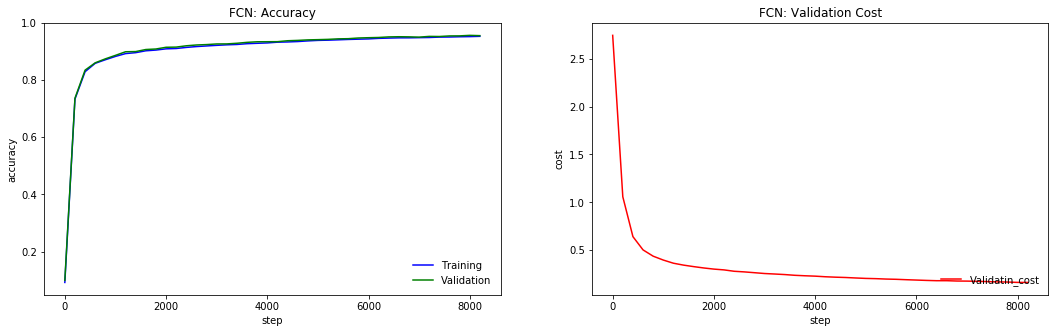

In [6]:
# plot learning result

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)a
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()

---
## High level api, Batch normalization

In [ ]:
# https://r2rt.com/implementing-batch-normalization-in-tensorflow.html
def batch_norm_wrapper(inputs, is_training, decay = 0.999):
    scale = tf.Variable(tf.ones([inputs.get_shape()[-1]]))
    beta = tf.Variable(tf.zeros([inputs.get_shape()[-1]]))
    pop_mean = tf.Variable(tf.zeros([inputs.get_shape()[-1]]), trainable=False)
    pop_var = tf.Variable(tf.ones([inputs.get_shape()[-1]]), trainable=False)

    if is_training:
        batch_mean, batch_var = tf.nn.moments(inputs,[0])
        train_mean = tf.assign(pop_mean,
                               pop_mean * decay + batch_mean * (1 - decay))
        train_var = tf.assign(pop_var,
                              pop_var * decay + batch_var * (1 - decay))
        with tf.control_dependencies([train_mean, train_var]):
            return tf.nn.batch_normalization(inputs,
                batch_mean, batch_var, beta, scale, epsilon)
    else:
        return tf.nn.batch_normalization(inputs,
            pop_mean, pop_var, beta, scale, epsilon)

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 15
# use mini batch
batch_size = 100
# dropout probability
DROPOUT=0.5
# for batch_norm
epsilon = 1e-5

def build_graph(is_training):
    # input place holders
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, 10])
    keep_prob = tf.placeholder(tf.float32) # 뉴런을 켤 확률

    W1 = tf.Variable(tf.random_normal([784, 256]))
    # W1 = tf.get_variable(name="weight_1", shape=[784, 256], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([256]))
    bn1 = batch_norm_wrapper(tf.matmul(X, W1) + b1, is_training)
    L1 = tf.nn.relu(bn1)
    # L1 = tf.nn.dropout(L1, keep_prob=keep_prob) #batch_norm을 넣었으므로 dropout는 뺌

    L2 = tf.layers.dense(inputs=L1, units=256, activation=tf.nn.relu)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
    L3 = tf.layers.dense(inputs=L2, units=256, activation=tf.nn.relu)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    hypothesis = tf.layers.dense(inputs=L3, units=10, activation=None)

    # define cost/loss & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=hypothesis, labels=Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.argmax(hypothesis, 1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))
    
    return X, Y, keep_prob, optimizer, cost, accuracy, hypothesis, tf.train.Saver()

In [ ]:
%%time

# reset and make a new graph
tf.reset_default_graph()
X, Y, keep_prob, optimizer, cost, accuracy, _,saver = build_graph(is_training=True)

# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(mnist.train.num_examples/batch_size*training_epochs)
for i in range(total_iter):
    batch = mnist.train.next_batch(batch_size)
    optimizer.run(feed_dict={X: batch[0], Y: batch[1], keep_prob:DROPOUT})

    if i % 200 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1})
        val_accuracy = accuracy.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels, keep_prob:1})
        cost_ = cost.eval(feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)
        
print('--------------------------')
print('Learning Finished!')

In [ ]:
# save trianed model
import os

directory = './tf-model'
if not os.path.exists(directory):
    os.makedirs(directory)
    
saved_model = saver.save(sess, directory+'/bn-save')

In [ ]:
# plot learning result

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()

In [ ]:
# reset and make a test graph
tf.reset_default_graph()
X, Y, keep_prob, _, cost, accuracy, hypothesis, saver = build_graph(is_training=False)

# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# reload model weights
saver.restore(sess, directory+'/bn-save')

# Test model and check accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob:1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob:1}))

---
## Batch norm: tensorflow 모델 저장/로드 필요 없는 버전
> tf.nn.layers 이용 (high level api)

In [8]:
# parameters
learning_rate = 0.001
training_epochs = 15
# use mini batch
batch_size = 100
# dropout probability
DROPOUT=0.5

def build_graph(optimizer):
    # input place holders
    X = tf.placeholder(tf.float32, [None, 784])
    Y = tf.placeholder(tf.float32, [None, 10])
    is_training = tf.placeholder(tf.bool) # 배치놈 위한 트레이닝/테스트 구분 불리언
    keep_prob = tf.placeholder(tf.float32) # 뉴런을 켤 확률

    W1 = tf.Variable(tf.random_normal([784, 256]))
    b1 = tf.Variable(tf.random_normal([256]))
    # default momentum=0.99, epsilon=0.001
    BN1 = tf.layers.batch_normalization(tf.matmul(X, W1)+b1, training=is_training)
    L1 = tf.nn.relu(BN1)
    
#     L1 = tf.layers.dense(inputs=X, units=256, activation=tf.nn.relu)
#     L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
    L2 = tf.layers.dense(inputs=L1, units=256, activation=tf.nn.relu)
    L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
    
    L3 = tf.layers.dense(inputs=L2, units=256, activation=tf.nn.relu)
    L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
    hypothesis = tf.layers.dense(inputs=L3, units=10, activation=None)

    # define loss/cost & optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=hypothesis, labels=Y))
    # select optimizer
    if optimizer == "SGD":
        train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    elif optimizer == "Adam":
        train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    elif optimizer == "AdaGrad":
        train_step = tf.train.AdagradOptimizer(learning_rate).minimize(cost)
    elif optimizer == "RMSProp":
        train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
    else: return print("input correct optimizer")

    predicted = tf.argmax(hypothesis, 1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))
    
    return X, Y, keep_prob, is_training, train_step, cost, accuracy

In [9]:
%%time

# reset and make a new graph
tf.reset_default_graph()
X, Y, keep_prob, is_training, optimizer, cost, accuracy = build_graph(optimizer='Adam')

# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(mnist.train.num_examples/batch_size*training_epochs)
for i in range(total_iter):
    batch = mnist.train.next_batch(batch_size)
    optimizer.run(feed_dict={X: batch[0], Y: batch[1], keep_prob:DROPOUT, is_training:True})

    if i % 200 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:mnist.train.images, Y:mnist.train.labels, keep_prob:1, is_training:True})
        val_accuracy = accuracy.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels, keep_prob:1, is_training:False})
        cost_ = cost.eval(feed_dict={X:mnist.test.images, Y:mnist.test.labels, keep_prob:1, is_training:False})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)
        
print('--------------------------')
print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob:1, is_training:False}))


step 0: acc_tr 0.161964, acc_tt 0.1378, cost 4.98152
step 200: acc_tr 0.909418, acc_tt 0.6952, cost 5.08009
step 400: acc_tr 0.931709, acc_tt 0.802, cost 2.91539
step 600: acc_tr 0.946945, acc_tt 0.815, cost 2.96264
step 800: acc_tr 0.956291, acc_tt 0.8156, cost 2.91826
step 1000: acc_tr 0.9602, acc_tt 0.8768, cost 1.6898
step 1200: acc_tr 0.9634, acc_tt 0.8758, cost 1.9128
step 1400: acc_tr 0.968091, acc_tt 0.9076, cost 1.27255
step 1600: acc_tr 0.970709, acc_tt 0.8888, cost 1.70617
step 1800: acc_tr 0.971982, acc_tt 0.9222, cost 1.08805
step 2000: acc_tr 0.975782, acc_tt 0.9288, cost 0.934583
step 2200: acc_tr 0.976309, acc_tt 0.9204, cost 1.06344
step 2400: acc_tr 0.980218, acc_tt 0.9276, cost 1.03382
step 2600: acc_tr 0.979473, acc_tt 0.9484, cost 0.725285
step 2800: acc_tr 0.981218, acc_tt 0.9406, cost 0.820861
step 3000: acc_tr 0.983218, acc_tt 0.9396, cost 0.776149
step 3200: acc_tr 0.982873, acc_tt 0.9294, cost 1.10003
step 3400: acc_tr 0.984782, acc_tt 0.9228, cost 1.274
step 

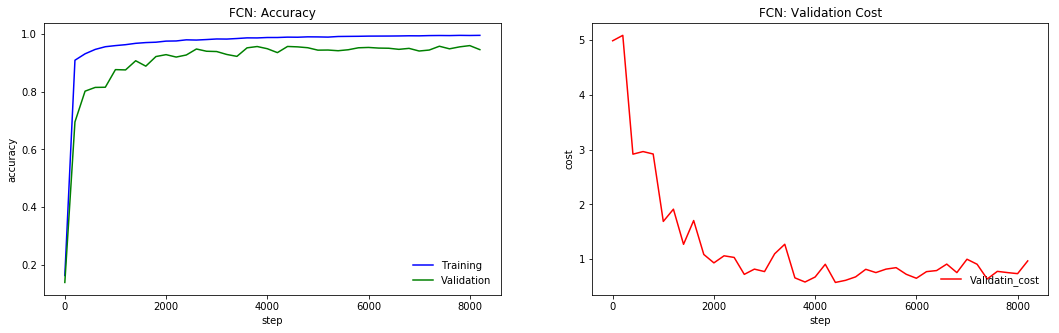

In [10]:
# plot learning result

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()

---
## Tensorboard
 - Optional

In [ ]:
'''
Graph and Loss visualization using Tensorboard.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''
# from __future__ import print_function

import tensorflow as tf
tf.reset_default_graph()

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_epoch = 1
logs_path = './tensorflow_logs/example/'

# tf Graph Input
# mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition => 10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making
# Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Create a summary to monitor cost tensor
tf.summary.scalar("loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_epoch == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))

    print("Run the command line:\n" \
          "--> tensorboard --logdir=tensorflow_logs " \
          "\nThen open http://localhost:6006/ into your web browser")
    
    print('localhost로 안들어가지면 터미널에 나온 주소 직접 입력 - 텐서보드 버전에 따라 조금씩 다름')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.183941720
Epoch: 0002 cost= 0.665369123
Epoch: 0003 cost= 0.552786895
Epoch: 0004 cost= 0.498635157
Epoch: 0005 cost= 0.465449721
Epoch: 0006 cost= 0.442571638
Epoch: 0007 cost= 0.425496781
Epoch: 0008 cost= 0.412198464
Epoch: 0009 cost= 0.401381053
Epoch: 0010 cost= 0.392420373
Epoch: 0011 cost= 0.384777394
Epoch: 0012 cost= 0.378127309
Epoch: 0013 cost= 0.372420933
Epoch: 0014 cost= 0.367325378
Epoch: 0015 cost= 0.362704330
